# Ejemplo de score de crédito

In [698]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Carga de datos

In [699]:
dfData = pd.read_csv(r"C:\Users\josea\Dropbox\CA0417\score\train.csv")

C:\Users\josea\AppData\Local\Temp\ipykernel_33524\1438989098.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  dfData = pd.read_csv(r"C:\Users\josea\Dropbox\CA0417\score\train.csv")


In [700]:
dfData

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [701]:
dfData1 = dfData[['ID','Age','Num_Bank_Accounts','Credit_Score']].copy()

## Variable dependiente

In [702]:
dfData1['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [703]:
dfData1['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [704]:
dfData1['malo']=dfData1['Credit_Score'].map({'Good':0, 'Standard':0, 'Poor':1})

In [705]:
dfData1['malo'].value_counts()

malo
0    71002
1    28998
Name: count, dtype: int64

## Variables independientes: Número de cuentas bancarias

In [706]:
dfCountBankAcc = dfData1['Num_Bank_Accounts'].value_counts().sort_index()
dfCountBankAcc.head(20)

Num_Bank_Accounts
-1        21
 0      4328
 1      4490
 2      4304
 3     11950
 4     12186
 5     12118
 6     13001
 7     12823
 8     12765
 9      5443
 10     5247
 11        9
 18        1
 26        1
 27        1
 28        3
 29        1
 30        1
 31        1
Name: count, dtype: int64

In [707]:
dfCountBankAcc.tail(5)

Num_Bank_Accounts
1786    1
1789    2
1793    1
1794    2
1798    2
Name: count, dtype: int64

In [708]:
dfData1 = dfData1.loc[(dfData1['Num_Bank_Accounts']>=0)&(dfData['Num_Bank_Accounts']<=10),:]

In [709]:
len(dfData1)

98655

In [710]:
dfCountBankAcc=dfData1['Num_Bank_Accounts'].value_counts().sort_index()
dfCountBankAcc

Num_Bank_Accounts
0      4328
1      4490
2      4304
3     11950
4     12186
5     12118
6     13001
7     12823
8     12765
9      5443
10     5247
Name: count, dtype: int64

In [711]:
dfTablaWoeNumCuentas = dfData1[['Num_Bank_Accounts','malo']].groupby('Num_Bank_Accounts').agg({'malo':['sum','count']})
dfTablaWoeNumCuentas

malo       
                    sum  count
Num_Bank_Accounts             
0                   761   4328
1                   706   4490
2                   634   4304
3                  1864  11950
4                  1921  12186
5                  1970  12118
6                  4665  13001
7                  4781  12823
8                  4647  12765
9                  3431   5443
10                 3201   5247

In [712]:
dfTablaWoeNumCuentas.columns = ['malo','total']
dfTablaWoeNumCuentas

,malo,total
Num_Bank_Accounts,,
0,761,4328
1,706,4490
2,634,4304
3,1864,11950
4,1921,12186
5,1970,12118
6,4665,13001
7,4781,12823
8,4647,12765


In [713]:
dfTablaWoeNumCuentas['probMalo'] = dfTablaWoeNumCuentas['malo'] / dfTablaWoeNumCuentas['total']
dfTablaWoeNumCuentas

,malo,total,probMalo
Num_Bank_Accounts,,,
0,761,4328,0.175832
1,706,4490,0.157238
2,634,4304,0.147305
3,1864,11950,0.155983
4,1921,12186,0.157640
5,1970,12118,0.162568
6,4665,13001,0.358819
7,4781,12823,0.372846
8,4647,12765,0.364042


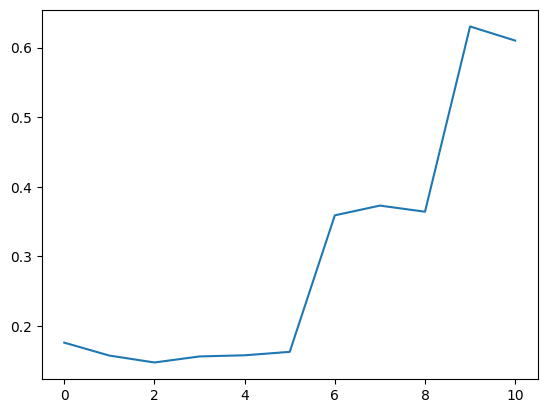

In [714]:
plt.plot(dfTablaWoeNumCuentas['probMalo'])

In [715]:
dfData1.loc[dfData1['Num_Bank_Accounts']>=8,'Num_Bank_Accounts'] = 8
dfDMalo = dfData1[['Num_Bank_Accounts','malo']]
dfTablaWoeNumCuentas = dfDMalo.groupby('Num_Bank_Accounts').agg({'malo':['sum','count']})
dfTablaWoeNumCuentas.columns = ['malo','total']
dfTablaWoeNumCuentas['probMalo'] = dfTablaWoeNumCuentas['malo'] / dfTablaWoeNumCuentas['total']
dfTablaWoeNumCuentas

,malo,total,probMalo
Num_Bank_Accounts,,,
0,761,4328,0.175832
1,706,4490,0.157238
2,634,4304,0.147305
3,1864,11950,0.155983
4,1921,12186,0.157640
5,1970,12118,0.162568
6,4665,13001,0.358819
7,4781,12823,0.372846
8,11279,23455,0.480878


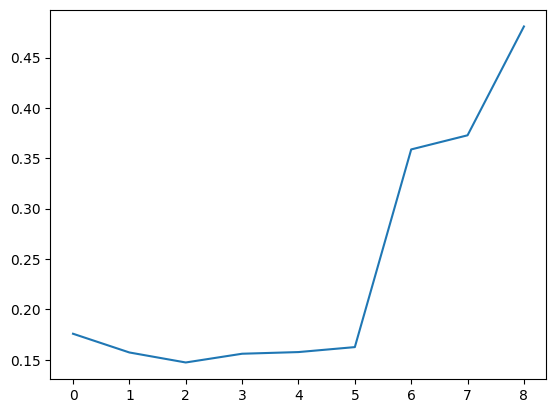

In [716]:
plt.plot(dfTablaWoeNumCuentas['probMalo'])

In [717]:
dfCountBankAcc=dfData1['Num_Bank_Accounts'].value_counts().sort_index()
dfCountBankAcc

Num_Bank_Accounts
0     4328
1     4490
2     4304
3    11950
4    12186
5    12118
6    13001
7    12823
8    23455
Name: count, dtype: int64

In [718]:
dfTablaWoeNumCuentas['bueno'] = dfTablaWoeNumCuentas['total']-dfTablaWoeNumCuentas['malo']
dfTablaWoeNumCuentas['distBad'] = dfTablaWoeNumCuentas['malo'] / dfTablaWoeNumCuentas['malo'].sum() 
dfTablaWoeNumCuentas['distGood'] = dfTablaWoeNumCuentas['bueno'] / dfTablaWoeNumCuentas['bueno'].sum()
dfTablaWoeNumCuentas['woe_NumCuentas'] = np.log(dfTablaWoeNumCuentas['distBad']/dfTablaWoeNumCuentas['distGood'])

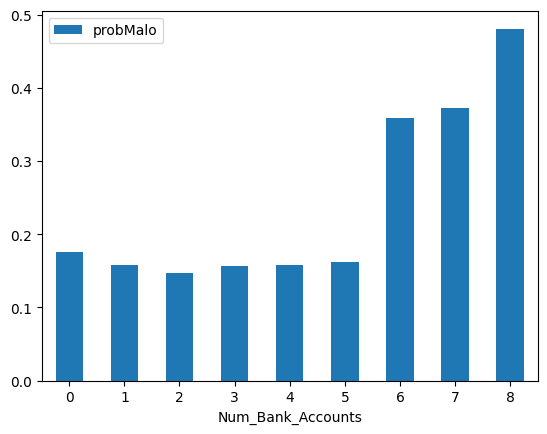

In [719]:
ax = dfTablaWoeNumCuentas.plot.bar(y='probMalo', rot=0)

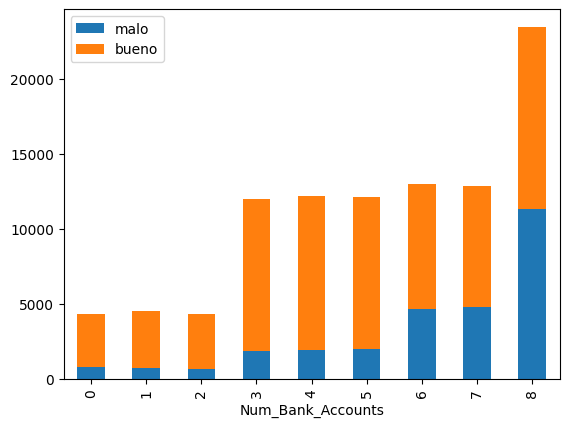

In [720]:
ax = dfTablaWoeNumCuentas[['malo','bueno']].plot.bar(stacked=True)

In [721]:
information_value = (dfTablaWoeNumCuentas['woe_NumCuentas'] *(dfTablaWoeNumCuentas['distBad'] -dfTablaWoeNumCuentas['distGood'] )).sum()
information_value

0.45996855100574124

In [722]:
contingencia = dfTablaWoeNumCuentas[['malo','bueno']]
contingencia

,malo,bueno
Num_Bank_Accounts,,
0,761,3567
1,706,3784
2,634,3670
3,1864,10086
4,1921,10265
5,1970,10148
6,4665,8336
7,4781,8042
8,11279,12176


In [723]:
from scipy.stats import chi2_contingency

In [724]:
res = chi2_contingency(contingencia)
res

Chi2ContingencyResult(statistic=9001.188124373635, pvalue=0.0, dof=8, expected_freq=array([[ 1253.84996199,  3074.15003801],
       [ 1300.7824236 ,  3189.2175764 ],
       [ 1246.89700471,  3057.10299529],
       [ 3461.99331002,  8488.00668998],
       [ 3530.36405656,  8655.63594344],
       [ 3510.66401095,  8607.33598905],
       [ 3766.47489737,  9234.52510263],
       [ 3714.90713091,  9108.09286909],
       [ 6795.06720389, 16659.93279611]]))

In [725]:
res = chi2_contingency(contingencia.transpose())
res

Chi2ContingencyResult(statistic=9001.188124373635, pvalue=0.0, dof=8, expected_freq=array([[ 1253.84996199,  1300.7824236 ,  1246.89700471,  3461.99331002,
         3530.36405656,  3510.66401095,  3766.47489737,  3714.90713091,
         6795.06720389],
       [ 3074.15003801,  3189.2175764 ,  3057.10299529,  8488.00668998,
         8655.63594344,  8607.33598905,  9234.52510263,  9108.09286909,
        16659.93279611]]))

In [726]:
dfTablaWoeNumCuentas.reset_index(inplace=True)

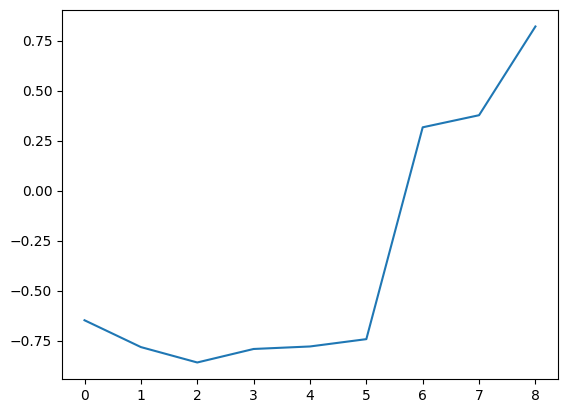

In [727]:
plt.plot(dfTablaWoeNumCuentas['woe_NumCuentas'])

In [728]:
dfData1 = pd.merge(dfData1,dfTablaWoeNumCuentas[['Num_Bank_Accounts','woe_NumCuentas']],on='Num_Bank_Accounts')

In [729]:
dfData1

,ID,Age,Num_Bank_Accounts,Credit_Score,malo,woe_NumCuentas
0,0x1602,23,3,Good,0,-0.791614
1,0x1603,23,3,Good,0,-0.791614
2,0x1604,-500,3,Good,0,-0.791614
3,0x1605,23,3,Good,0,-0.791614
4,0x1606,23,3,Good,0,-0.791614
...,...,...,...,...,...,...
98650,0x25f8b,38_,6,Standard,0,0.316314
98651,0x25f8c,38,6,Poor,1,0.316314
98652,0x25f8d,38,6,Poor,1,0.316314
98653,0x25f98,48_,6,Poor,1,0.316314


In [730]:
import statsmodels.formula.api as smf

In [731]:
model = smf.logit('malo ~ woe_NumCuentas', data=dfData1).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.555712
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   malo   No. Observations:                98655
Model:                          Logit   Df Residuals:                    98653
Method:                           MLE   Df Model:                            1
Date:                Fri, 25 Oct 2024   Pseudo R-squ.:                 0.07672
Time:                        15:36:43   Log-Likelihood:                -54824.
converged:                       True   LL-Null:                       -59379.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.8968      0.007   -120.539      0.000      -0.911      -0.882
woe_NumCuentas   

In [732]:
model.predict()

array([0.15598326, 0.15598326, 0.15598326, ..., 0.35881855, 0.35881855,
       0.35881855])

In [733]:
corte = .3

In [734]:
y_pred = model.predict() > corte
y_test = dfData1['malo']

In [735]:
sum(y_pred)

49279

In [736]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [737]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 63.09%
Confusion Matrix:
 [[41520 28554]
 [ 7856 20725]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.59      0.70     70074
           1       0.42      0.73      0.53     28581

    accuracy                           0.63     98655
   macro avg       0.63      0.66      0.61     98655
weighted avg       0.72      0.63      0.65     98655



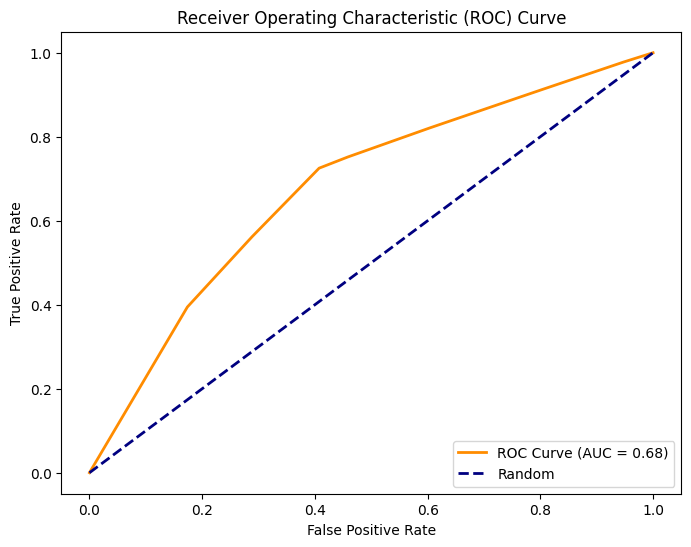

In [738]:
y_prob = model.predict()
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [739]:
roc_auc

0.6787725312865012

## Variables independientes: Edad

In [740]:
dfData1['Age'].unique()

array(['23', '-500', '32', ..., '598', '4347', '5642'], dtype=object)

In [741]:
dfData1['Edad'] = dfData1['Age'].str.replace('_','')
dfData1['Edad'] = pd.to_numeric(dfData1['Edad'],errors='coerce')
dfData1['Edad'].isna().sum()

0

In [742]:
dfData1['Edad'].min()

-500

In [743]:
dfData1['Edad'].max()

8698

In [744]:
(dfData1['Edad']>90).sum()

1864

In [745]:
(dfData1['Edad']<18).sum()

6525

In [746]:
dfData1 = dfData1.loc[(dfData1['Edad']<=90)&(dfData1['Edad']>=18),:].copy()

In [747]:
dfData1

,ID,Age,Num_Bank_Accounts,Credit_Score,malo,woe_NumCuentas,Edad
0,0x1602,23,3,Good,0,-0.791614,23
1,0x1603,23,3,Good,0,-0.791614,23
3,0x1605,23,3,Good,0,-0.791614,23
4,0x1606,23,3,Good,0,-0.791614,23
5,0x1607,23,3,Good,0,-0.791614,23
...,...,...,...,...,...,...,...
98650,0x25f8b,38_,6,Standard,0,0.316314,38
98651,0x25f8c,38,6,Poor,1,0.316314,38
98652,0x25f8d,38,6,Poor,1,0.316314,38
98653,0x25f98,48_,6,Poor,1,0.316314,48


In [748]:
dfData1['Edad'].max()

56

In [749]:
dfData1['Edad'].min()

18

In [750]:
dfData1['EdadCat'] = pd.cut(dfData1['Edad'],bins = 5)

In [751]:
dfData1

,ID,Age,Num_Bank_Accounts,Credit_Score,malo,woe_NumCuentas,Edad,EdadCat
0,0x1602,23,3,Good,0,-0.791614,23,"(17.962, 25.6]"
1,0x1603,23,3,Good,0,-0.791614,23,"(17.962, 25.6]"
3,0x1605,23,3,Good,0,-0.791614,23,"(17.962, 25.6]"
4,0x1606,23,3,Good,0,-0.791614,23,"(17.962, 25.6]"
5,0x1607,23,3,Good,0,-0.791614,23,"(17.962, 25.6]"
...,...,...,...,...,...,...,...,...
98650,0x25f8b,38_,6,Standard,0,0.316314,38,"(33.2, 40.8]"
98651,0x25f8c,38,6,Poor,1,0.316314,38,"(33.2, 40.8]"
98652,0x25f8d,38,6,Poor,1,0.316314,38,"(33.2, 40.8]"
98653,0x25f98,48_,6,Poor,1,0.316314,48,"(40.8, 48.4]"


In [752]:
dfData1['EdadCat'].value_counts()

EdadCat
(25.6, 33.2]      22301
(17.962, 25.6]    21371
(33.2, 40.8]      19472
(40.8, 48.4]      17559
(48.4, 56.0]       9563
Name: count, dtype: int64

In [753]:
dfTablaWoeEdad = dfData1[['EdadCat','malo']].groupby('EdadCat').agg({'malo':['sum','count']})
dfTablaWoeEdad.columns = ['malo','total']
dfTablaWoeEdad['probMalo'] = dfTablaWoeEdad['malo'] / dfTablaWoeEdad['total']
dfTablaWoeEdad

,malo,total,probMalo
EdadCat,,,
"(17.962, 25.6]",6572,21371,0.307520
"(25.6, 33.2]",6906,22301,0.309672
"(33.2, 40.8]",5988,19472,0.307518
"(40.8, 48.4]",4710,17559,0.268239
"(48.4, 56.0]",1092,9563,0.114190


In [754]:
dfTablaWoeEdad.index = dfTablaWoeEdad.index.astype(str)

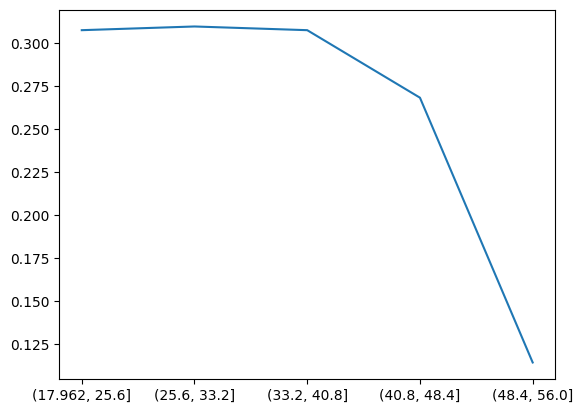

In [755]:
plt.plot(dfTablaWoeEdad['probMalo'])

In [756]:
dfCountEdadCat=dfData1['EdadCat'].value_counts().sort_index()
dfCountEdadCat

EdadCat
(17.962, 25.6]    21371
(25.6, 33.2]      22301
(33.2, 40.8]      19472
(40.8, 48.4]      17559
(48.4, 56.0]       9563
Name: count, dtype: int64

In [757]:
dfTablaWoeEdad['bueno'] = dfTablaWoeEdad['total']-dfTablaWoeEdad['malo']
dfTablaWoeEdad['distBad'] = dfTablaWoeEdad['malo'] / dfTablaWoeEdad['malo'].sum() 
dfTablaWoeEdad['distGood'] = dfTablaWoeEdad['bueno'] / dfTablaWoeEdad['bueno'].sum()
dfTablaWoeEdad['woe_edad'] = np.log(dfTablaWoeEdad['distBad']/dfTablaWoeEdad['distGood'])

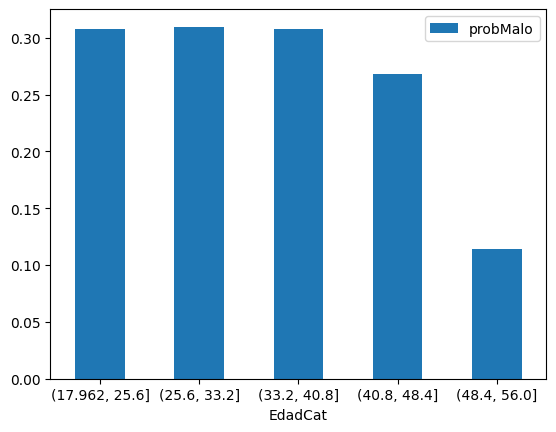

In [758]:
ax = dfTablaWoeEdad.plot.bar(y='probMalo', rot=0)

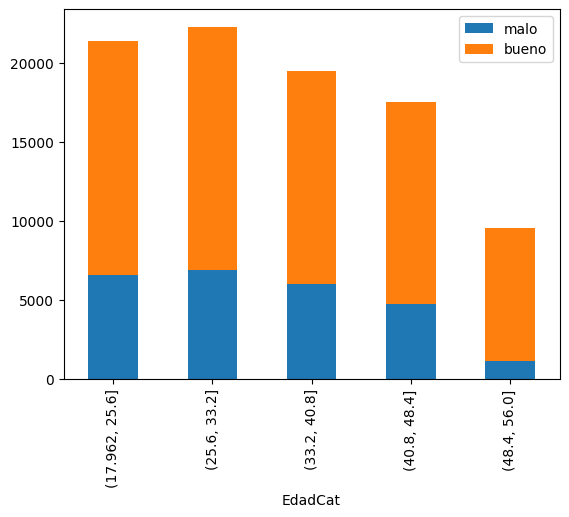

In [759]:
ax = dfTablaWoeEdad[['malo','bueno']].plot.bar(stacked=True)

In [760]:
information_value = (dfTablaWoeEdad['woe_edad'] *(dfTablaWoeEdad['distBad'] -dfTablaWoeEdad['distGood'] )).sum()
information_value

0.1102783211295145

In [761]:
contingencia = dfTablaWoeEdad[['malo','bueno']]
contingencia

,malo,bueno
EdadCat,,
"(17.962, 25.6]",6572,14799
"(25.6, 33.2]",6906,15395
"(33.2, 40.8]",5988,13484
"(40.8, 48.4]",4710,12849
"(48.4, 56.0]",1092,8471


In [762]:
from scipy.stats import chi2_contingency

In [763]:
res = chi2_contingency(contingencia)
res

Chi2ContingencyResult(statistic=1567.2510901901444, pvalue=0.0, dof=4, expected_freq=array([[ 5982.34582235, 15388.65417765],
       [ 6242.67905967, 16058.32094033],
       [ 5450.76214743, 14021.23785257],
       [ 4915.25947754, 12643.74052246],
       [ 2676.95349301,  6886.04650699]]))

In [764]:
res = chi2_contingency(contingencia.transpose())
res

Chi2ContingencyResult(statistic=1567.2510901901444, pvalue=0.0, dof=4, expected_freq=array([[ 5982.34582235,  6242.67905967,  5450.76214743,  4915.25947754,
         2676.95349301],
       [15388.65417765, 16058.32094033, 14021.23785257, 12643.74052246,
         6886.04650699]]))

In [765]:
dfTablaWoeEdad.reset_index(inplace=True)

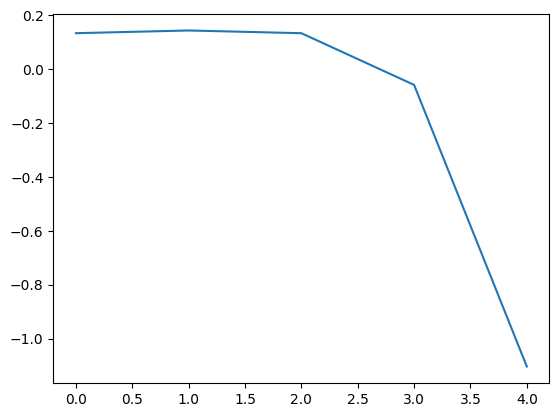

In [766]:
plt.plot(dfTablaWoeEdad['woe_edad'])

In [767]:
dfData1['EdadCat'] = dfData1['EdadCat'].astype(str)

In [768]:
dfData1 = pd.merge(dfData1,dfTablaWoeEdad[['EdadCat','woe_edad']],on='EdadCat')

In [769]:
dfData1

,ID,Age,Num_Bank_Accounts,Credit_Score,malo,woe_NumCuentas,Edad,EdadCat,woe_edad
0,0x1602,23,3,Good,0,-0.791614,23,"(17.962, 25.6]",0.133076
1,0x1603,23,3,Good,0,-0.791614,23,"(17.962, 25.6]",0.133076
2,0x1605,23,3,Good,0,-0.791614,23,"(17.962, 25.6]",0.133076
3,0x1606,23,3,Good,0,-0.791614,23,"(17.962, 25.6]",0.133076
4,0x1607,23,3,Good,0,-0.791614,23,"(17.962, 25.6]",0.133076
...,...,...,...,...,...,...,...,...,...
90261,0x25c0f,51,6,Standard,0,0.316314,51,"(48.4, 56.0]",-1.103820
90262,0x25c10,51,6,Standard,0,0.316314,51,"(48.4, 56.0]",-1.103820
90263,0x25c11,51,6,Standard,0,0.316314,51,"(48.4, 56.0]",-1.103820
90264,0x25c12,51,6,Standard,0,0.316314,51,"(48.4, 56.0]",-1.103820


In [770]:
model = smf.logit('malo ~ woe_edad', data=dfData1).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.582857
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   malo   No. Observations:                90266
Model:                          Logit   Df Residuals:                    90264
Method:                           MLE   Df Model:                            1
Date:                Fri, 25 Oct 2024   Pseudo R-squ.:                 0.01691
Time:                        15:36:44   Log-Likelihood:                -52612.
converged:                       True   LL-Null:                       -53517.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9448      0.008   -125.536      0.000      -0.960      -0.930
woe_edad       1.0000      0.

In [771]:
import seaborn as sns

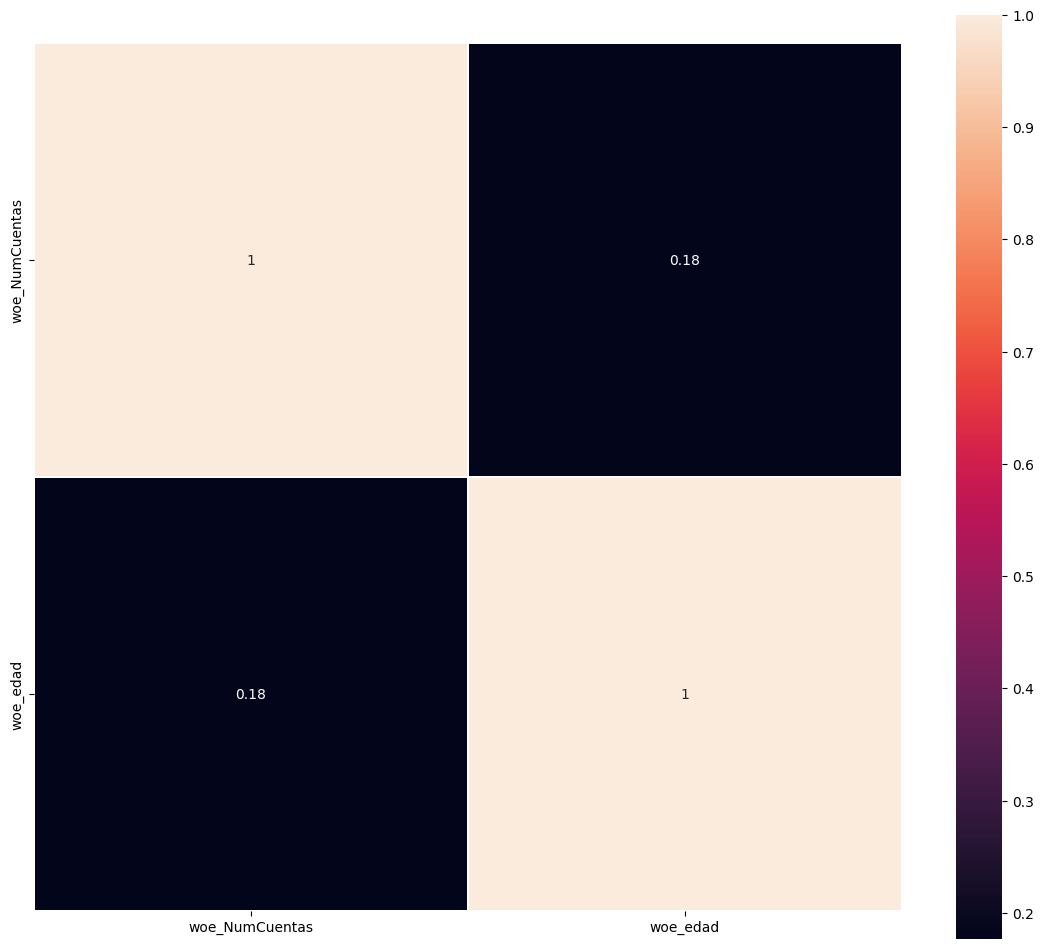

In [772]:
plt.figure(figsize=(14,12))
sns.heatmap(dfData1[['woe_NumCuentas','woe_edad']].corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [773]:
model2 = smf.logit('malo ~ woe_NumCuentas+woe_edad', data=dfData1).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.544473
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   malo   No. Observations:                90266
Model:                          Logit   Df Residuals:                    90264
Method:                           MLE   Df Model:                            1
Date:                Fri, 25 Oct 2024   Pseudo R-squ.:                 0.01691
Time:                        15:36:44   Log-Likelihood:                -52612.
converged:                       True   LL-Null:                       -53517.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9448      0.008   -125.536      0.000      -0.960      -0.930
woe_edad       1.0000      0.

In [774]:
model2.predict()

array([0.17260431, 0.17260431, 0.17260431, ..., 0.19267398, 0.19267398,
       0.19267398])

In [775]:
corte = .3

In [776]:
y_pred = model2.predict() > corte
y_test = dfData1['malo']

In [777]:
sum(y_pred)

41435

In [778]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 65.39%
Confusion Matrix:
 [[41295 23703]
 [ 7536 17732]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.64      0.73     64998
           1       0.43      0.70      0.53     25268

    accuracy                           0.65     90266
   macro avg       0.64      0.67      0.63     90266
weighted avg       0.73      0.65      0.67     90266



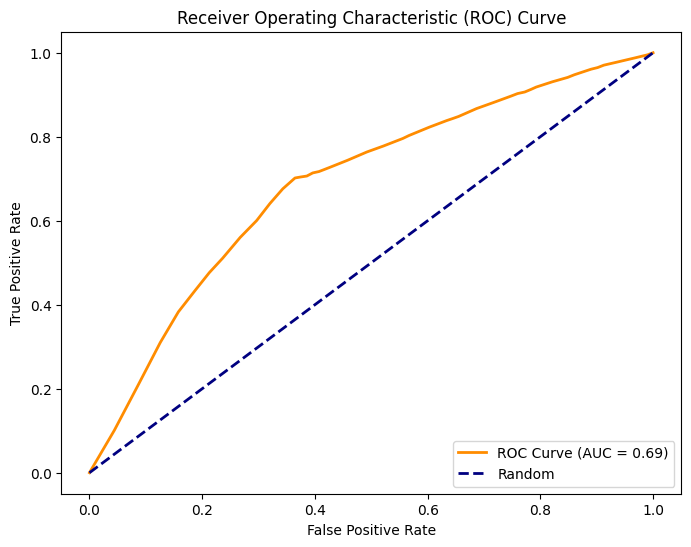

In [779]:
y_prob = model2.predict()
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [780]:
roc_auc

0.6887977530614877

## Modelo con validación

In [781]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score 

In [782]:
df_train, df_test = train_test_split(dfData1, test_size = 0.25, random_state=42)

In [783]:
model_train = smf.logit('malo ~ woe_NumCuentas+woe_edad', data=df_train).fit()
print(model_train.summary())

Optimization terminated successfully.
         Current function value: 0.544274
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   malo   No. Observations:                67699
Model:                          Logit   Df Residuals:                    67696
Method:                           MLE   Df Model:                            2
Date:                Fri, 25 Oct 2024   Pseudo R-squ.:                 0.08141
Time:                        15:36:45   Log-Likelihood:                -36847.
converged:                       True   LL-Null:                       -40112.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9286      0.009   -102.112      0.000      -0.946      -0.911
woe_NumCuentas   

In [784]:
model_train.predict()

array([0.17389204, 0.07454596, 0.16444597, ..., 0.1595456 , 0.17222388,
       0.178847  ])

In [785]:
len(model_train.predict())

67699

In [786]:
len(model_train.predict(df_test))

22567

In [787]:
corte = .3

In [788]:
y_pred = model_train.predict(df_test) > corte
y_test = df_test['malo']

In [789]:
sum(y_pred)

10388

In [790]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 65.18%
Confusion Matrix:
 [[10272  5951]
 [ 1907  4437]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.63      0.72     16223
           1       0.43      0.70      0.53      6344

    accuracy                           0.65     22567
   macro avg       0.64      0.67      0.63     22567
weighted avg       0.73      0.65      0.67     22567



In [791]:
y_prob = model_train.predict()
len(y_prob)
len(y_test)

22567

In [794]:
y_prob = model_train.predict(df_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

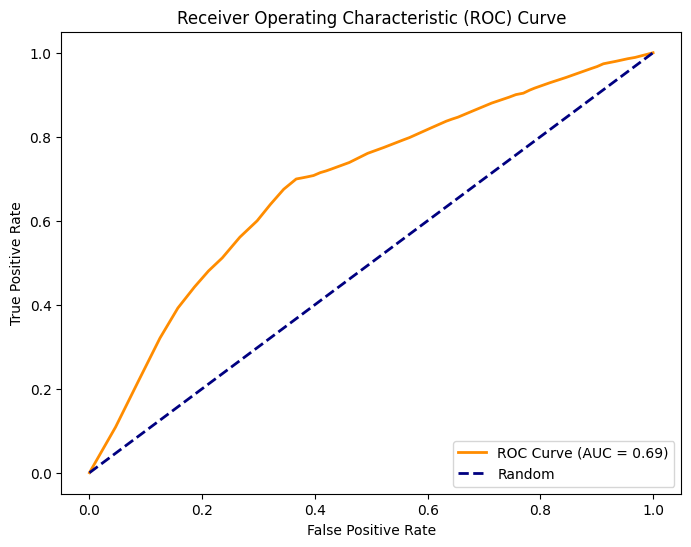

In [795]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [796]:
roc_auc

0.6891965379434597

In [798]:
gini = (1+roc_auc)/2
gini

0.8445982689717298